<a href="https://colab.research.google.com/github/sujataprasad01/Using-JSON-data-for-analysis/blob/main/Project_3_Using_JSON_data_for_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#numpy
import numpy as np
#pandas
import pandas as pd
#matplotlib
import matplotlib.pyplot as plt
#seaborn
import seaborn as sns
#BeautifulSoup(scrapping)(Gathering of data)
from bs4 import BeautifulSoup
# request
import requests
#data cleaning RegEx
import re
import sqlite3
import seaborn as sns

In [ ]:
url='https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json'
req=requests.get(url)

In [ ]:
req

<Response [200]>

In [ ]:
soup=BeautifulSoup(req.content)

In [ ]:
soup

<html><body><p>{ "_id" : { "$oid" : "50b59cd75bed76f46522c34e" }, "student_id" : 0, "class_id" : 2, "scores" : [ { "type" : "exam", "score" : 57.92947112575566 }, { "type" : "quiz", "score" : 21.24542588206755 }, { "type" : "homework", "score" : 68.19567810587429 }, { "type" : "homework", "score" : 67.95019716560351 }, { "type" : "homework", "score" : 18.81037253352722 } ] }
{ "_id" : { "$oid" : "50b59cd75bed76f46522c34f" }, "student_id" : 0, "class_id" : 28, "scores" : [ { "type" : "exam", "score" : 39.17749400402234 }, { "type" : "quiz", "score" : 78.44172815491468 }, { "type" : "homework", "score" : 20.81782269075502 }, { "type" : "homework", "score" : 70.44520452408949 }, { "type" : "homework", "score" : 50.66616327819226 }, { "type" : "homework", "score" : 53.84983118363991 } ] }
{ "_id" : { "$oid" : "50b59cd75bed76f46522c350" }, "student_id" : 0, "class_id" : 5, "scores" : [ { "type" : "exam", "score" : 88.22950674232497 }, { "type" : "quiz", "score" : 79.28962650427184 }, { "typ

In [ ]:
df=pd.read_json("https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json", lines=True)

In [ ]:
df

,_id,student_id,class_id,scores
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         280 non-null    object
 1   student_id  280 non-null    int64 
 2   class_id    280 non-null    int64 
 3   scores      280 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.9+ KB


In [ ]:
df.scores[0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

# For id cleaning

In [ ]:
df['_id']

0      {'$oid': '50b59cd75bed76f46522c34e'}
1      {'$oid': '50b59cd75bed76f46522c34f'}
2      {'$oid': '50b59cd75bed76f46522c350'}
3      {'$oid': '50b59cd75bed76f46522c351'}
4      {'$oid': '50b59cd75bed76f46522c352'}
                       ...                 
275    {'$oid': '50b59cd75bed76f46522c461'}
276    {'$oid': '50b59cd75bed76f46522c462'}
277    {'$oid': '50b59cd75bed76f46522c463'}
278    {'$oid': '50b59cd75bed76f46522c464'}
279    {'$oid': '50b59cd75bed76f46522c465'}
Name: _id, Length: 280, dtype: object

In [ ]:
arr=[]
for i in df['_id']:
    arr.append(str(i))

In [ ]:
arr[1]

"{'$oid': '50b59cd75bed76f46522c34f'}"

In [ ]:
re.sub("^{|'.*':|'|}|'}$"," ",arr[1])

'    50b59cd75bed76f46522c34f  '

In [ ]:
new_id=[]
for i in df['_id']:
   i=re.sub("^{|'.*':|'|}|'}$"," ",str(i))
   new_id.append(i)

In [ ]:
new_id

['    50b59cd75bed76f46522c34e  ',
 '    50b59cd75bed76f46522c34f  ',
 '    50b59cd75bed76f46522c350  ',
 '    50b59cd75bed76f46522c351  ',
 '    50b59cd75bed76f46522c352  ',
 '    50b59cd75bed76f46522c353  ',
 '    50b59cd75bed76f46522c354  ',
 '    50b59cd75bed76f46522c355  ',
 '    50b59cd75bed76f46522c356  ',
 '    50b59cd75bed76f46522c357  ',
 '    50b59cd75bed76f46522c358  ',
 '    50b59cd75bed76f46522c359  ',
 '    50b59cd75bed76f46522c35a  ',
 '    50b59cd75bed76f46522c35b  ',
 '    50b59cd75bed76f46522c35c  ',
 '    50b59cd75bed76f46522c35d  ',
 '    50b59cd75bed76f46522c35e  ',
 '    50b59cd75bed76f46522c35f  ',
 '    50b59cd75bed76f46522c360  ',
 '    50b59cd75bed76f46522c361  ',
 '    50b59cd75bed76f46522c362  ',
 '    50b59cd75bed76f46522c363  ',
 '    50b59cd75bed76f46522c364  ',
 '    50b59cd75bed76f46522c365  ',
 '    50b59cd75bed76f46522c366  ',
 '    50b59cd75bed76f46522c367  ',
 '    50b59cd75bed76f46522c368  ',
 '    50b59cd75bed76f46522c369  ',
 '    50b59cd75bed76

In [ ]:
df["_id"]=new_id

In [ ]:
df

,_id,student_id,class_id,scores
0,50b59cd75bed76f46522c34e,0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,50b59cd75bed76f46522c34f,0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,50b59cd75bed76f46522c350,0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,50b59cd75bed76f46522c351,0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,50b59cd75bed76f46522c352,0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,50b59cd75bed76f46522c462,48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,50b59cd75bed76f46522c463,48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,50b59cd75bed76f46522c464,48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         280 non-null    object
 1   student_id  280 non-null    int64 
 2   class_id    280 non-null    int64 
 3   scores      280 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.9+ KB


# For scores cleaning

In [ ]:
df['scores']

0      [{'type': 'exam', 'score': 57.92947112575566},...
1      [{'type': 'exam', 'score': 39.17749400402234},...
2      [{'type': 'exam', 'score': 88.22950674232497},...
3      [{'type': 'exam', 'score': 59.1805667559299}, ...
4      [{'type': 'exam', 'score': 4.444435759027499},...
                             ...                        
275    [{'type': 'exam', 'score': 19.75901367795435},...
276    [{'type': 'exam', 'score': 66.79008851052096},...
277    [{'type': 'exam', 'score': 87.50309579619501},...
278    [{'type': 'exam', 'score': 17.49112864462374},...
279    [{'type': 'exam', 'score': 26.67878234847454},...
Name: scores, Length: 280, dtype: object

In [ ]:
arr1=[]
for i in df['scores']:
    arr1.append(str(i))

In [ ]:
arr1[1]

"[{'type': 'exam', 'score': 39.17749400402234}, {'type': 'quiz', 'score': 78.44172815491468}, {'type': 'homework', 'score': 20.81782269075502}, {'type': 'homework', 'score': 70.44520452408949}, {'type': 'homework', 'score': 50.66616327819226}, {'type': 'homework', 'score': 53.84983118363991}]"

In [ ]:
re.sub("'|},.*:|:|type|exam|{|,|score|}]", " ", arr1[1])

'[                39.17749400402234  53.84983118363991 '

In [ ]:
re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", arr1[1])

'[   39.17749400402234    78.44172815491468    20.81782269075502    70.44520452408949    50.66616327819226    53.84983118363991]'

In [ ]:
re.sub("'|type':|}|{|,|}", "", arr1[1])

'[ exam score: 39.17749400402234  quiz score: 78.44172815491468  homework score: 20.81782269075502  homework score: 70.44520452408949  homework score: 50.66616327819226  homework score: 53.84983118363991]'

In [ ]:
new_scores=[]
for i in df["scores"]:
  i=re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(i))
  new_scores.append(i)

In [ ]:
new_scoresss=[]
for i in df["scores"]:
  i=re.sub("'|type':|}|{|,|}", "", str(i))
  new_scoresss.append(i)

In [ ]:
new_scoresss

['[ exam score: 57.92947112575566  quiz score: 21.24542588206755  homework score: 68.1956781058743  homework score: 67.95019716560351  homework score: 18.81037253352722]',
 '[ exam score: 39.17749400402234  quiz score: 78.44172815491468  homework score: 20.81782269075502  homework score: 70.44520452408949  homework score: 50.66616327819226  homework score: 53.84983118363991]',
 '[ exam score: 88.22950674232497  quiz score: 79.28962650427184  homework score: 18.66254946562674  homework score: 40.28154176513361  homework score: 1.23735944117882  homework score: 88.96101200683958]',
 '[ exam score: 59.1805667559299  quiz score: 47.58960202938239  homework score: 6.48470951607214  homework score: 68.33519637418685  homework score: 78.53068038180965]',
 '[ exam score: 4.444435759027499  quiz score: 28.63057857803885  homework score: 86.79352850434199  homework score: 83.9164548767836]',
 '[ exam score: 14.34345947841966  quiz score: 47.65945482174327  homework score: 83.42772189120254  home

In [ ]:
new_scores

['[   57.92947112575566    21.24542588206755    68.1956781058743    67.95019716560351    18.81037253352722]',
 '[   39.17749400402234    78.44172815491468    20.81782269075502    70.44520452408949    50.66616327819226    53.84983118363991]',
 '[   88.22950674232497    79.28962650427184    18.66254946562674    40.28154176513361    1.23735944117882    88.96101200683958]',
 '[   59.1805667559299    47.58960202938239    6.48470951607214    68.33519637418685    78.53068038180965]',
 '[   4.444435759027499    28.63057857803885    86.79352850434199    83.9164548767836]',
 '[   14.34345947841966    47.65945482174327    83.42772189120254    49.86812935368258    39.85525554437086]',
 '[   18.20492211025179    60.4769945611789    75.62999921143397    72.41228797373115    74.06744381708968]',
 '[   56.81981513867912    15.03004654140545    59.58797547174019    67.42173915928456    71.25502554312342    94.46662737566072]',
 '[   60.19473636151568    64.15966210014162    82.80835343023551]',
 '[   5

In [ ]:
df["scores"]=new_scoresss

In [ ]:
df

,_id,student_id,class_id,scores
0,50b59cd75bed76f46522c34e,0,2,[ exam score: 57.92947112575566 quiz score: 2...
1,50b59cd75bed76f46522c34f,0,28,[ exam score: 39.17749400402234 quiz score: 7...
2,50b59cd75bed76f46522c350,0,5,[ exam score: 88.22950674232497 quiz score: 7...
3,50b59cd75bed76f46522c351,0,16,[ exam score: 59.1805667559299 quiz score: 47...
4,50b59cd75bed76f46522c352,0,24,[ exam score: 4.444435759027499 quiz score: 2...
...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,[ exam score: 19.75901367795435 quiz score: 8...
276,50b59cd75bed76f46522c462,48,14,[ exam score: 66.79008851052096 quiz score: 6...
277,50b59cd75bed76f46522c463,48,8,[ exam score: 87.50309579619501 quiz score: 7...
278,50b59cd75bed76f46522c464,48,15,[ exam score: 17.49112864462374 quiz score: 2...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         280 non-null    object
 1   student_id  280 non-null    int64 
 2   class_id    280 non-null    int64 
 3   scores      280 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.9+ KB


In [ ]:
df.scores[0]

'[ exam score: 57.92947112575566  quiz score: 21.24542588206755  homework score: 68.1956781058743  homework score: 67.95019716560351  homework score: 18.81037253352722]'

In [2]:
df2=pd.read_json("https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json", lines=True)

In [ ]:
df2

,_id,student_id,class_id,scores
0,50b59cd75bed76f46522c34e,0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,50b59cd75bed76f46522c34f,0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,50b59cd75bed76f46522c350,0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,50b59cd75bed76f46522c351,0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,50b59cd75bed76f46522c352,0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,50b59cd75bed76f46522c462,48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,50b59cd75bed76f46522c463,48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,50b59cd75bed76f46522c464,48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [ ]:
df2.scores[0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [ ]:
Exam_score=[]
Quiz_score=[]
Homework_score_avg=[]
count=0
count2=0
for j in df2['scores']:
  if count==0:
   Exam_score.append(df2['scores'][count][count2])
   count=count2=count+1
  elif count==1:
   Quiz_score.append(df2['scores'][count][count2])
   count=count2=count+1
  else:
    count=0
    count2=0
    Homework_score_avg.append(df2['scores'][count][count2])
    count=count2=count+1

  # x=j[2].round(2)
  # y=j[3].round(2)
  # z=j[4].round(2)
  # avg=(x+y+z)/2
  # Homework_score_avg.append(avg)

# data=df.scores={"Exam_score":Exam_score,
#                 "Quiz_score":Quiz_score,
#                 "Homework_score_avg":Homework_score_avg
#                 }
# df.append(data)

In [ ]:
Exam_score

[{'type': 'exam', 'score': 57.92947112575566}]

In [ ]:
Exam_score=[]
Quiz_score=[]
Homework1=[]
Homework2=[]
Homework3=[]

count=0
count2=0
for j in df2['scores']:
  if count2==0:
   i=re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(df2['scores'][count][count2]))
   Exam_score.append(i)
   count2=count2+1
  elif count2==1:
   i=re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(df2['scores'][count][count2]))
   Quiz_score.append(i)
   count2=count2+1
  elif count2==2:
   i=re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(df2['scores'][count][count2]))
   Homework1.append(i)
   count2=count2+1
  # elif count2==3:
  #  i=re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(df2['scores'][count][count2]))
  #  Homework2.append(i)
  #  count2=count2+1
  else:
    count=count+1
    count2=0
    i=re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(df2['scores'][count][count2]))
    Homework3.append(i)


In [ ]:
Exam_score

['   57.92947112575566',
 '   39.17749400402234',
 '   88.22950674232497',
 '   59.1805667559299',
 '   4.444435759027499',
 '   14.34345947841966',
 '   18.20492211025179',
 '   56.81981513867912',
 '   60.19473636151568',
 '   58.83297411100884',
 '   30.93065784731665',
 '   63.09737877102438',
 '   47.38775906993299',
 '   24.05118737353409',
 '   80.6212442791788',
 '   68.93370297588363',
 '   5.231166018738698',
 '   70.32953992025745',
 '   76.01876674517686',
 '   35.47946463550763',
 '   47.71786215806567',
 '   88.80822542748272',
 '   95.99100704101919',
 '   95.7950561891157',
 '   86.2587791014086',
 '   8.942018968262111',
 '   31.08963442339938',
 '   0.599873518920623',
 '   5.466727688497352',
 '   44.49334356888737',
 '   46.17925407652636',
 '   60.13912489935064',
 '   91.60286135110157',
 '   0.654309678602604',
 '   67.50593066420024',
 '   15.36563152024366',
 '   73.48459944869943',
 '   73.04238861317688',
 '   21.58296008740177',
 '   43.64758440439862',
 '  

In [ ]:
data={"Exam_score":Exam_score,
                "Quiz_score":Quiz_score,
                "Homework1":Homework1,
                "Homework2":Homework3
                }


In [ ]:
df4=pd.DataFrame(data)

In [ ]:
df['scores'][0]

nan

In [ ]:
df4

,Exam_score,Quiz_score,Homework1,Homework2
0,57.92947112575566,21.24542588206755,68.1956781058743,39.17749400402234
1,39.17749400402234,78.44172815491468,20.81782269075502,88.22950674232497
2,88.22950674232497,79.28962650427184,18.66254946562674,59.1805667559299
3,59.1805667559299,47.58960202938239,6.48470951607214,4.444435759027499
4,4.444435759027499,28.63057857803885,86.79352850434199,14.34345947841966
...,...,...,...,...
65,24.14000777332587,18.71542045987035,69.02053148128002,76.4386250061283
66,76.4386250061283,24.01487604578166,11.5105043026943,85.20875356673056
67,85.20875356673056,45.50089366701895,52.77197861787801,69.17634380939022
68,69.17634380939022,61.20182926719762,73.3293624199466,46.4063271595364


In [ ]:
df2.append(df4, ignore_index=True)

<ipython-input-199-94a80385ea18>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2.append(df4, ignore_index=True)


,index,student_id,class_id,scores,Exam_score,Homework1,Homework2
0,0.0,0.0,2.0,NaN,NaN,NaN,NaN
1,1.0,0.0,28.0,NaN,NaN,NaN,NaN
2,2.0,0.0,5.0,NaN,NaN,NaN,NaN
3,3.0,0.0,16.0,NaN,NaN,NaN,NaN
4,4.0,0.0,24.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
345,NaN,NaN,NaN,NaN,24.14000777332587,69.02053148128002,76.4386250061283
346,NaN,NaN,NaN,NaN,76.4386250061283,11.5105043026943,85.20875356673056
347,NaN,NaN,NaN,NaN,85.20875356673056,52.77197861787801,69.17634380939022
348,NaN,NaN,NaN,NaN,69.17634380939022,73.3293624199466,46.4063271595364


In [ ]:
df3=pd.concat([df2, df4], ignore_index=True)
df3.drop('scores', axis=1)

,index,_id,student_id,class_id,Exam_score,Quiz_score,Homework1,Homework2
0,0.0,50b59cd75bed76f46522c34e,0.0,2.0,NaN,NaN,NaN,NaN
1,1.0,50b59cd75bed76f46522c34f,0.0,28.0,NaN,NaN,NaN,NaN
2,2.0,50b59cd75bed76f46522c350,0.0,5.0,NaN,NaN,NaN,NaN
3,3.0,50b59cd75bed76f46522c351,0.0,16.0,NaN,NaN,NaN,NaN
4,4.0,50b59cd75bed76f46522c352,0.0,24.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
345,NaN,NaN,NaN,NaN,24.14000777332587,18.71542045987035,69.02053148128002,76.4386250061283
346,NaN,NaN,NaN,NaN,76.4386250061283,24.01487604578166,11.5105043026943,85.20875356673056
347,NaN,NaN,NaN,NaN,85.20875356673056,45.50089366701895,52.77197861787801,69.17634380939022
348,NaN,NaN,NaN,NaN,69.17634380939022,61.20182926719762,73.3293624199466,46.4063271595364


In [ ]:
df3

,index,_id,student_id,class_id,scores,Exam_score,Quiz_score,Homework1,Homework2
0,0.0,50b59cd75bed76f46522c34e,0.0,2.0,NaN,NaN,NaN,NaN,NaN
1,1.0,50b59cd75bed76f46522c34f,0.0,28.0,NaN,NaN,NaN,NaN,NaN
2,2.0,50b59cd75bed76f46522c350,0.0,5.0,NaN,NaN,NaN,NaN,NaN
3,3.0,50b59cd75bed76f46522c351,0.0,16.0,NaN,NaN,NaN,NaN,NaN
4,4.0,50b59cd75bed76f46522c352,0.0,24.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
345,NaN,NaN,NaN,NaN,NaN,24.14000777332587,18.71542045987035,69.02053148128002,76.4386250061283
346,NaN,NaN,NaN,NaN,NaN,76.4386250061283,24.01487604578166,11.5105043026943,85.20875356673056
347,NaN,NaN,NaN,NaN,NaN,85.20875356673056,45.50089366701895,52.77197861787801,69.17634380939022
348,NaN,NaN,NaN,NaN,NaN,69.17634380939022,61.20182926719762,73.3293624199466,46.4063271595364


In [ ]:
Exam_score=[]
Quiz_score=[]
Homework1=[]
Homework2=[]
Homework3=[]

count=0
count2=0
for j in df2['scores']:
  if count2==0:
   i=re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(df2['scores'][count][count2]))
   Exam_score.append(round(float((i)),2))
   count2=count2+1
  elif count2==1:
   i=re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(df2['scores'][count][count2]))
   Quiz_score.append(round(float((i)),2))
   count2=count2+1
  elif count2==2:
   i=re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(df2['scores'][count][count2]))
   Homework1.append(round(float((i)),2))
   count2=count2+1
  # elif count2==3:
  #  i=re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(df2['scores'][count][count2]))
  #  Homework2.append(round(float((i)),2))
  #  count2=count2+1
  else:
    count=count+1
    count2=0
    i=re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(df2['scores'][count][count2]))
    Homework3.append(round(float((i)),2))


In [ ]:
Exam_score

[57.93,
 39.18,
 88.23,
 59.18,
 4.44,
 14.34,
 18.2,
 56.82,
 60.19,
 58.83,
 30.93,
 63.1,
 47.39,
 24.05,
 80.62,
 68.93,
 5.23,
 70.33,
 76.02,
 35.48,
 47.72,
 88.81,
 95.99,
 95.8,
 86.26,
 8.94,
 31.09,
 0.6,
 5.47,
 44.49,
 46.18,
 60.14,
 91.6,
 0.65,
 67.51,
 15.37,
 73.48,
 73.04,
 21.58,
 43.65,
 22.39,
 33.4,
 46.18,
 98.35,
 55.41,
 7.22,
 62.87,
 54.54,
 24.77,
 28.34,
 62.6,
 7.34,
 43.23,
 89.13,
 40.25,
 11.46,
 85.3,
 84.87,
 58.04,
 32.06,
 68.49,
 64.93,
 73.51,
 56.73,
 85.31,
 24.14,
 76.44,
 85.21,
 69.18,
 46.41]

In [ ]:
# WITHOUT FOR LOOP

# For score cleaning

In [ ]:
df2['scores'][0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [3]:
# List Comprihension
Exam_score=[round(float(re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(df2['scores'][i][0]))),2) for i in range(len(df2['scores']))]
Quiz_score=[round(float(re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str(df2['scores'][i][1]))),2) for i in range(len(df2['scores']))]

In [ ]:
Exam_score

[57.93,
 39.18,
 88.23,
 59.18,
 4.44,
 14.34,
 18.2,
 56.82,
 60.19,
 58.83,
 30.93,
 63.1,
 47.39,
 24.05,
 80.62,
 68.93,
 5.23,
 70.33,
 76.02,
 35.48,
 47.72,
 88.81,
 95.99,
 95.8,
 86.26,
 8.94,
 31.09,
 0.6,
 5.47,
 44.49,
 46.18,
 60.14,
 91.6,
 0.65,
 67.51,
 15.37,
 73.48,
 73.04,
 21.58,
 43.65,
 22.39,
 33.4,
 46.18,
 98.35,
 55.41,
 7.22,
 62.87,
 54.54,
 24.77,
 28.34,
 62.6,
 7.34,
 43.23,
 89.13,
 40.25,
 11.46,
 85.3,
 84.87,
 58.04,
 32.06,
 68.49,
 64.93,
 73.51,
 56.73,
 85.31,
 24.14,
 76.44,
 85.21,
 69.18,
 46.41,
 8.56,
 13.21,
 9.88,
 49.62,
 43.93,
 30.86,
 78.2,
 26.99,
 74.52,
 93.69,
 83.05,
 99.7,
 79.77,
 99.49,
 36.82,
 22.32,
 94.08,
 4.44,
 84.22,
 26.11,
 77.02,
 53.36,
 25.84,
 69.74,
 25.58,
 96.97,
 75.93,
 65.21,
 43.78,
 50.45,
 28.45,
 47.52,
 19.1,
 49.38,
 24.21,
 16.78,
 46.16,
 33.73,
 18.14,
 92.88,
 86.11,
 12.07,
 7.23,
 61.47,
 46.2,
 64.0,
 55.94,
 27.69,
 82.81,
 32.89,
 89.94,
 90.03,
 47.17,
 21.11,
 30.87,
 55.05,
 84.12,
 50.24,
 

In [4]:
# More easy
Exam_sc=[round(i[0]['score'],2) for i in df2['scores']]

In [ ]:
Exam_sc

[57.93,
 39.18,
 88.23,
 59.18,
 4.44,
 14.34,
 18.2,
 56.82,
 60.19,
 58.83,
 30.93,
 63.1,
 47.39,
 24.05,
 80.62,
 68.93,
 5.23,
 70.33,
 76.02,
 35.48,
 47.72,
 88.81,
 95.99,
 95.8,
 86.26,
 8.94,
 31.09,
 0.6,
 5.47,
 44.49,
 46.18,
 60.14,
 91.6,
 0.65,
 67.51,
 15.37,
 73.48,
 73.04,
 21.58,
 43.65,
 22.39,
 33.4,
 46.18,
 98.35,
 55.41,
 7.22,
 62.87,
 54.54,
 24.77,
 28.34,
 62.6,
 7.34,
 43.23,
 89.13,
 40.25,
 11.46,
 85.3,
 84.87,
 58.04,
 32.06,
 68.49,
 64.93,
 73.51,
 56.73,
 85.31,
 24.14,
 76.44,
 85.21,
 69.18,
 46.41,
 8.56,
 13.21,
 9.88,
 49.62,
 43.93,
 30.86,
 78.2,
 26.99,
 74.52,
 93.69,
 83.05,
 99.7,
 79.77,
 99.49,
 36.82,
 22.32,
 94.08,
 4.44,
 84.22,
 26.11,
 77.02,
 53.36,
 25.84,
 69.74,
 25.58,
 96.97,
 75.93,
 65.21,
 43.78,
 50.45,
 28.45,
 47.52,
 19.1,
 49.38,
 24.21,
 16.78,
 46.16,
 33.73,
 18.14,
 92.88,
 86.11,
 12.07,
 7.23,
 61.47,
 46.2,
 64.0,
 55.94,
 27.69,
 82.81,
 32.89,
 89.94,
 90.03,
 47.17,
 21.11,
 30.87,
 55.05,
 84.12,
 50.24,
 

In [ ]:
Homework_score=[round(float(re.sub("'|:|type|exam|}|{|,|score|homework|quiz|}", "", str((df2['scores'][i][2]+ df2['scores'][i][3]+df2['scores'][i][4])/3))),2) for i in range(len(df2['scores']))]

TypeError: ignored

In [ ]:
df2

,_id,student_id,class_id,scores
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [ ]:
for i in range(len(df2['scores'])):
  li=re.findall('\d+.\d+', str(df2['scores'][i][2:]))
  print(list(map(float, li)))

[57.92947112575566, 21.24542588206755, 68.1956781058743, 67.95019716560351, 18.81037253352722]
[39.17749400402234, 78.44172815491468, 20.81782269075502, 70.44520452408949, 50.66616327819226, 53.84983118363991]
[88.22950674232497, 79.28962650427184, 18.66254946562674, 40.28154176513361, 1.23735944117882, 88.96101200683958]
[59.1805667559299, 47.58960202938239, 6.48470951607214, 68.33519637418685, 78.53068038180965]
[4.444435759027499, 28.63057857803885, 86.79352850434199, 83.9164548767836]
[14.34345947841966, 47.65945482174327, 83.42772189120254, 49.86812935368258, 39.85525554437086]
[18.20492211025179, 60.4769945611789, 75.62999921143397, 72.41228797373115, 74.06744381708968]
[56.81981513867912, 15.03004654140545, 59.58797547174019, 67.42173915928456, 71.25502554312342, 94.46662737566072]
[60.19473636151568, 64.15966210014162, 82.80835343023551]
[58.83297411100884, 49.66835710930263, 18.05861540807023, 80.04086698967356]
[30.93065784731665, 55.98003281528393, 55.6752702814148, 63.15391

In [5]:
homework_avg=[]
for i in range(len(df2['scores'])):
  li=re.findall('\d+.\d+', str(df2['scores'][i][2:]))
  homework_avg.append(round(sum(list(map(float, li)))/len(list(map(float, li))),2))

In [ ]:
homework_avg

[46.83,
 52.23,
 52.78,
 52.02,
 50.95,
 47.03,
 60.16,
 60.76,
 69.05,
 51.65,
 51.43,
 55.62,
 26.32,
 68.4,
 62.31,
 58.58,
 32.64,
 73.62,
 55.21,
 63.72,
 73.07,
 46.48,
 55.72,
 86.87,
 54.52,
 50.01,
 44.11,
 47.8,
 54.38,
 65.31,
 65.93,
 38.66,
 76.3,
 41.31,
 61.49,
 43.36,
 67.94,
 41.55,
 35.1,
 62.08,
 46.67,
 64.23,
 58.76,
 60.11,
 47.17,
 23.0,
 37.87,
 28.95,
 38.25,
 33.62,
 54.99,
 53.42,
 61.41,
 40.89,
 50.91,
 24.99,
 60.7,
 39.18,
 55.99,
 12.83,
 60.16,
 52.18,
 83.38,
 38.17,
 59.99,
 27.99,
 48.23,
 61.16,
 53.35,
 34.3,
 33.95,
 16.83,
 47.9,
 52.99,
 46.5,
 70.25,
 57.22,
 57.79,
 42.53,
 52.83,
 61.04,
 81.75,
 64.76,
 37.01,
 35.33,
 39.12,
 48.29,
 30.22,
 66.96,
 38.76,
 43.58,
 33.15,
 42.79,
 77.09,
 38.04,
 58.1,
 67.55,
 44.55,
 46.88,
 68.73,
 59.03,
 62.5,
 31.25,
 51.89,
 51.13,
 10.21,
 44.22,
 59.8,
 38.78,
 51.12,
 66.9,
 25.8,
 43.11,
 47.56,
 34.59,
 45.58,
 47.06,
 41.5,
 67.2,
 42.25,
 63.09,
 59.47,
 57.62,
 62.71,
 51.32,
 76.73,
 67.73,


In [ ]:
Exam_score

[57.93,
 39.18,
 88.23,
 59.18,
 4.44,
 14.34,
 18.2,
 56.82,
 60.19,
 58.83,
 30.93,
 63.1,
 47.39,
 24.05,
 80.62,
 68.93,
 5.23,
 70.33,
 76.02,
 35.48,
 47.72,
 88.81,
 95.99,
 95.8,
 86.26,
 8.94,
 31.09,
 0.6,
 5.47,
 44.49,
 46.18,
 60.14,
 91.6,
 0.65,
 67.51,
 15.37,
 73.48,
 73.04,
 21.58,
 43.65,
 22.39,
 33.4,
 46.18,
 98.35,
 55.41,
 7.22,
 62.87,
 54.54,
 24.77,
 28.34,
 62.6,
 7.34,
 43.23,
 89.13,
 40.25,
 11.46,
 85.3,
 84.87,
 58.04,
 32.06,
 68.49,
 64.93,
 73.51,
 56.73,
 85.31,
 24.14,
 76.44,
 85.21,
 69.18,
 46.41,
 8.56,
 13.21,
 9.88,
 49.62,
 43.93,
 30.86,
 78.2,
 26.99,
 74.52,
 93.69,
 83.05,
 99.7,
 79.77,
 99.49,
 36.82,
 22.32,
 94.08,
 4.44,
 84.22,
 26.11,
 77.02,
 53.36,
 25.84,
 69.74,
 25.58,
 96.97,
 75.93,
 65.21,
 43.78,
 50.45,
 28.45,
 47.52,
 19.1,
 49.38,
 24.21,
 16.78,
 46.16,
 33.73,
 18.14,
 92.88,
 86.11,
 12.07,
 7.23,
 61.47,
 46.2,
 64.0,
 55.94,
 27.69,
 82.81,
 32.89,
 89.94,
 90.03,
 47.17,
 21.11,
 30.87,
 55.05,
 84.12,
 50.24,
 

In [ ]:
Quiz_score

[21.25,
 78.44,
 79.29,
 47.59,
 28.63,
 47.66,
 60.48,
 15.03,
 64.16,
 49.67,
 55.98,
 69.08,
 9.96,
 77.89,
 40.65,
 65.4,
 9.92,
 66.24,
 47.45,
 94.14,
 82.49,
 42.2,
 70.27,
 99.71,
 0.72,
 66.81,
 78.16,
 78.68,
 48.7,
 89.45,
 82.2,
 16.49,
 77.87,
 65.75,
 60.43,
 15.06,
 75.01,
 27.96,
 3.63,
 62.64,
 61.1,
 92.72,
 91.53,
 34.61,
 80.78,
 0.86,
 29.46,
 8.36,
 67.45,
 3.74,
 32.67,
 68.79,
 48.71,
 11.49,
 69.1,
 1.85,
 8.01,
 16.57,
 11.0,
 5.03,
 86.58,
 32.2,
 90.79,
 12.07,
 63.13,
 18.72,
 24.01,
 45.5,
 61.2,
 10.18,
 5.21,
 26.92,
 4.95,
 59.86,
 82.6,
 87.66,
 81.95,
 50.03,
 1.12,
 97.44,
 74.58,
 51.99,
 72.01,
 20.62,
 1.24,
 95.36,
 90.87,
 15.03,
 68.51,
 44.01,
 3.35,
 45.11,
 12.95,
 74.54,
 85.78,
 44.17,
 70.61,
 57.3,
 73.37,
 92.15,
 61.68,
 47.41,
 58.76,
 78.27,
 72.48,
 3.42,
 16.13,
 45.87,
 64.67,
 3.51,
 79.08,
 27.33,
 59.82,
 23.89,
 3.79,
 35.13,
 48.33,
 25.21,
 26.89,
 82.37,
 75.88,
 11.5,
 99.91,
 41.76,
 77.98,
 95.2,
 82.22,
 55.86,
 3.69,
 

In [ ]:
l=[]
for i in df['scores']:
  k=[]
  for j in i:
    if(j['type']=='homework'):
      k.append(j['score'])
    x=sum(k)/len(k)
    l.append(x)

TypeError: ignored

In [6]:
df2

,_id,student_id,class_id,scores
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [7]:
new_id=[]
for i in df2['_id']:
   i=re.sub("^{|'.*':|'|}|'}$"," ",str(i))
   new_id.append(i)

In [8]:
df2['_id']=new_id

In [9]:
df2

,_id,student_id,class_id,scores
0,50b59cd75bed76f46522c34e,0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,50b59cd75bed76f46522c34f,0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,50b59cd75bed76f46522c350,0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,50b59cd75bed76f46522c351,0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,50b59cd75bed76f46522c352,0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,50b59cd75bed76f46522c462,48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,50b59cd75bed76f46522c463,48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,50b59cd75bed76f46522c464,48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


# Final df

In [11]:
new_df=pd.DataFrame({'id':df2['_id'], 'student_id':df2['student_id'], 'class_id':df2['class_id'],
                     'exam_score':Exam_score, 'quiz_score': Quiz_score, 'homwork_score':homework_avg
                     })

In [12]:
new_df

,id,student_id,class_id,exam_score,quiz_score,homwork_score
0,50b59cd75bed76f46522c34e,0,2,57.93,21.25,51.65
1,50b59cd75bed76f46522c34f,0,28,39.18,78.44,48.94
2,50b59cd75bed76f46522c350,0,5,88.23,79.29,37.29
3,50b59cd75bed76f46522c351,0,16,59.18,47.59,51.12
4,50b59cd75bed76f46522c352,0,24,4.44,28.63,85.35
...,...,...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,19.76,88.30,30.80
276,50b59cd75bed76f46522c462,48,14,66.79,6.84,84.03
277,50b59cd75bed76f46522c463,48,8,87.50,77.95,60.19
278,50b59cd75bed76f46522c464,48,15,17.49,26.63,52.28


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             280 non-null    object 
 1   student_id     280 non-null    int64  
 2   class_id       280 non-null    int64  
 3   exam_score     280 non-null    float64
 4   quiz_score     280 non-null    float64
 5   homwork_score  280 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
new_df.describe()

,student_id,class_id,exam_score,quiz_score,homwork_score
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,23.717857,15.096429,50.831143,48.960893,49.278679
std,14.314029,8.958766,28.709625,29.398710,14.238049
min,0.000000,0.000000,0.500000,0.720000,10.210000
25%,11.000000,7.000000,24.117500,23.837500,39.165000
50%,24.000000,15.500000,49.685000,49.850000,50.675000
75%,37.000000,23.000000,75.517500,72.822500,59.552500
max,49.000000,30.000000,99.980000,99.910000,86.870000


In [ ]:
new_df.drop('class_id', inplace=True, axis=1)

In [ ]:
new_df

,id,student_id,exam_score,quiz_score,homwork_score
0,50b59cd75bed76f46522c34e,0,57.93,21.25,46.83
1,50b59cd75bed76f46522c34f,0,39.18,78.44,52.23
2,50b59cd75bed76f46522c350,0,88.23,79.29,52.78
3,50b59cd75bed76f46522c351,0,59.18,47.59,52.02
4,50b59cd75bed76f46522c352,0,4.44,28.63,50.95
...,...,...,...,...,...
275,50b59cd75bed76f46522c461,48,19.76,88.30,40.09
276,50b59cd75bed76f46522c462,48,66.79,6.84,52.55
277,50b59cd75bed76f46522c463,48,87.50,77.95,67.70
278,50b59cd75bed76f46522c464,48,17.49,26.63,40.19


In [ ]:
new_df.drop(['student_id'], axis=1)

,id,exam_score,quiz_score,homwork_score
0,50b59cd75bed76f46522c34e,57.93,21.25,46.83
1,50b59cd75bed76f46522c34f,39.18,78.44,52.23
2,50b59cd75bed76f46522c350,88.23,79.29,52.78
3,50b59cd75bed76f46522c351,59.18,47.59,52.02
4,50b59cd75bed76f46522c352,4.44,28.63,50.95
...,...,...,...,...
275,50b59cd75bed76f46522c461,19.76,88.30,40.09
276,50b59cd75bed76f46522c462,66.79,6.84,52.55
277,50b59cd75bed76f46522c463,87.50,77.95,67.70
278,50b59cd75bed76f46522c464,17.49,26.63,40.19


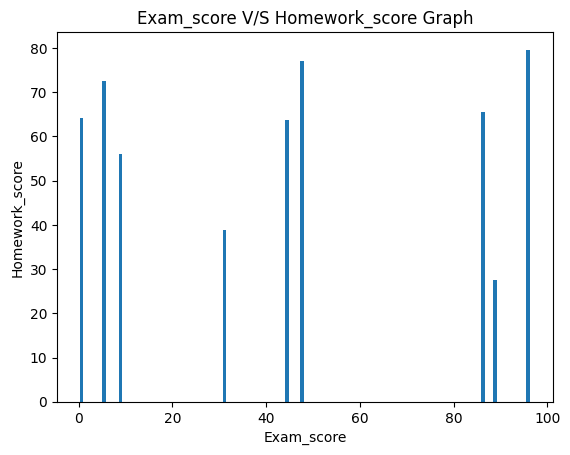

In [20]:
x=(new_df['exam_score'][20:30])
y=(new_df['homwork_score'][20:30])
plt.bar(x,y)

plt.title('Exam_score V/S Homework_score Graph')

plt.xlabel('Exam_score')
plt.ylabel('Homework_score')

plt.show()

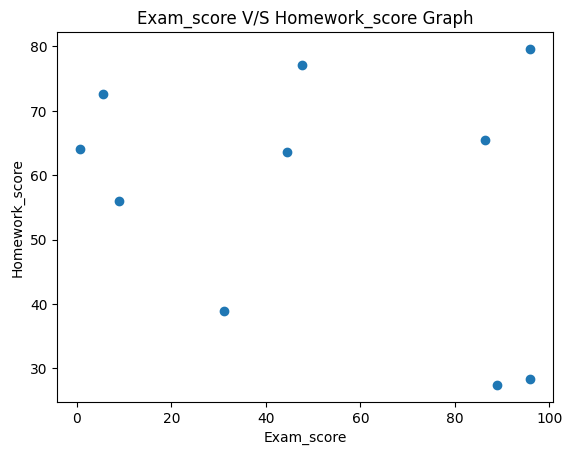

In [22]:
x=(new_df['exam_score'][20:30])
y=(new_df['homwork_score'][20:30])
plt.scatter(x,y)

plt.title('Exam_score V/S Homework_score Graph')

plt.xlabel('Exam_score')
plt.ylabel('Homework_score')

plt.show()

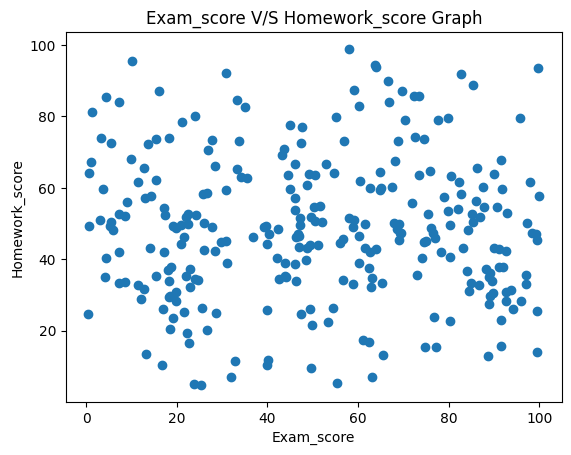

In [23]:
x=(new_df['exam_score'][:])
y=(new_df['homwork_score'][:])
plt.scatter(x,y)

plt.title('Exam_score V/S Homework_score Graph')

plt.xlabel('Exam_score')
plt.ylabel('Homework_score')

plt.show()